# Data Visualization


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Misión

La misión de este notebook es pasar de tener visualizaciones como estas:

![antes](images/antes.svg)

A tener visualizaciones como éstas:


![despues](images/despues.svg)

## Estilos

Es posible configurar un estilo global para todas las visualizaciones, Matplotlib tiene un [catálogo completo](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) de los estilos disponibles. Los más populares son:

- default
- bmh
- seaborn
- ggplot

Para usar un estilo particular, se debe ejecutar el siguiente comando con el nombre del estilo, los nombres pueden obtenerse del catálogo online u opcionalmente mostrando la lista `print(plt.style.available)`

In [2]:
plt.style.use("bmh")

![default](https://matplotlib.org/stable/_images/sphx_glr_style_sheets_reference_001.png)
![bmh](https://matplotlib.org/stable/_images/sphx_glr_style_sheets_reference_005.png)
![seaborn](https://matplotlib.org/stable/_images/sphx_glr_style_sheets_reference_009.png)
![ggplot](https://matplotlib.org/stable/_images/sphx_glr_style_sheets_reference_011.png)

También es posible crear un nuevo estilo personalizado, pero para ello se recomiendan tener conocimientos de Teoría de Color y Diseño Gráfico. Practicamente cada aspecto de los gráficos puede personalizarse de manera independiente, el nombre y valores posibles de los parámetros pueden encontrarse en la [guía oficial de personalización](https://matplotlib.org/stable/tutorials/introductory/customizing.html).

Para modificar uno de estos parámetros basta con acceder a él con `plt.rcParams` y utilizar la sintaxis de diccionario para modificar el valor deseado. Un ejemplo práctico es el de configurar el tamaño de las visualizaciones para que se muestren bien en Jupyter, como se ve en el siguiente ejemplo:

In [3]:
plt.rcParams["figure.figsize"] = 16, 5

A la hora de elegir el tamaño de la figura, lo mejor es elegir números que tengan una proporción divisible por el número áureo ($\approx 1.618$), esta proporción es una de las más "agradables a la vista". Para elegir los números fácilmente, basta con escoger números de la sucesión de Fibonnacci.

Sucesión de Fibonacci: 1, 1, 2, 3, 5, 8, 13, 21, ...

Es escoje primero el alto, en este caso 5 pulgadas (matplotlib mide por defecto en pulgadas) y luego se calcula el ancho como el doble del segundo número, en este caso $8\times2=16$. Por lo tanto el tamaño adecuado será de `(16, 5)`.

En caso de que se vaya a publicar en una plataforma determinada, se recomienda leer las especificaciones y usar la relación de aspecto que ellos recomienden. Una guía actualizada puede encontrarse en [el portal de Sprout Social](https://sproutsocial.com/insights/social-media-video-specs-guide/#linkedin)

## Creando Dataset Artificial

Se crea un dataset artifical que simula la variación de un stock futuro. Características de este dataset:

- Los valores medidos son los cambios porcentuales con respecto a la primer observación.
- La varianza disminuye con el tiempo hasta estabilizarse en un valor final
- Al inicio el valor oscila entre valores positivos y negativos

Este dataset se usará para todos los ejemplos

In [4]:
np.random.seed(71)

n = 50
decay = 0.05
noise = 10
start_point = np.random.normal(500, 50)

data = np.random.normal(0, noise, size=n).cumsum()  # Inicio con un Random Walk Continuo
data *= np.repeat(np.exp(-decay), n).cumprod()      # Disminución exponencial de varianza conforme avanza el tiempo
data += start_point                                 # Traslación hasta el punto inicial deseado 

original_data = data.copy()                         # Se guarda una copia con valores absolutos

data /= data[0]                                     # Se expresa en ratio con respecto al inicio 
data -= 1                                           # Se expresa como cambio porcentual con respecto al inicio
data *= 100                                         # Conversión a porcentaje

## Tipos de visualización

En matplotlib existen distintos tipos de visualización

### Continua

La forma más común de mostrar puntos, se asume que los puntos son equidistantes y que existe una interpolación lineal (una línea recta) entre puntos sucesivos

In [7]:
data

array([ 0.        , -0.7420683 ,  0.3144966 , -0.37373038,  0.73958363,
        2.68926233,  1.22086614,  1.59313546,  0.4516925 ,  0.12882788,
        1.98627472,  1.17068502, -0.29021935, -1.97109177, -1.19274894,
       -1.08577028, -1.08872103,  0.09411335, -1.01896937, -0.97727601,
       -0.60539212, -0.72362039, -0.11322269, -0.42713467, -0.63652579,
       -0.51761807, -1.000733  , -0.36257123,  0.15878582,  0.80258812,
        0.38750622,  0.50552259,  0.86314011,  1.55488762,  0.86991321,
        0.82088187,  1.39912485,  1.77279011,  2.13204046,  2.19297977,
        2.51638711,  2.53182127,  2.32305257,  2.4964901 ,  2.16479367,
        2.06671995,  2.00135767,  2.11090883,  2.11749868,  1.98321138])

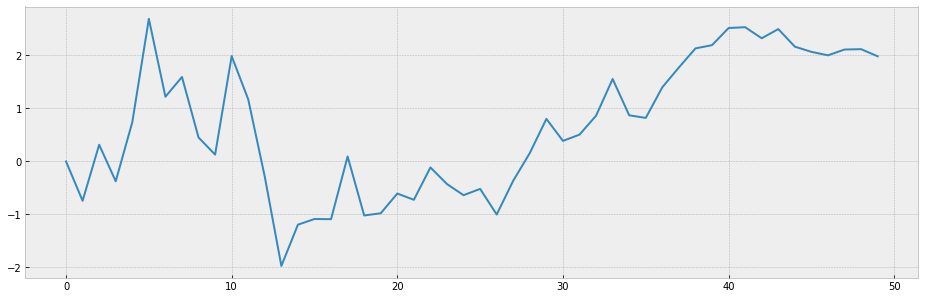

In [5]:
plt.plot(data);

### Escalón

Esta representación es ideal para mostrar cambios discretos. Existen tres alternativas `pre`, `mid` y `post`. Para notar la diferencia, observar el gráfico en el primer punto y último punto

In [9]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

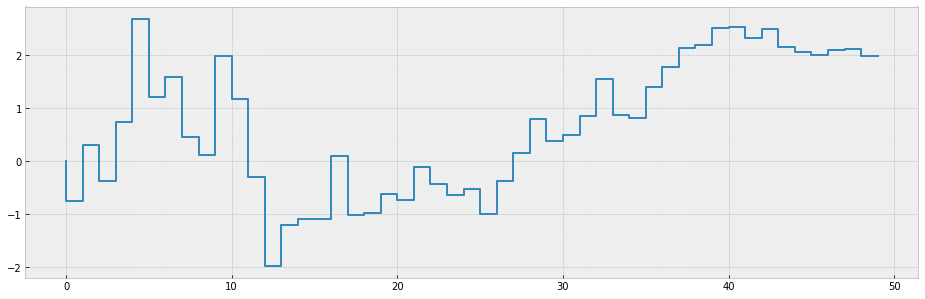

In [12]:
x = np.arange(len(data))
plt.step(x, data, where='pre');   # Los puntos representan el borde derecho del escalón

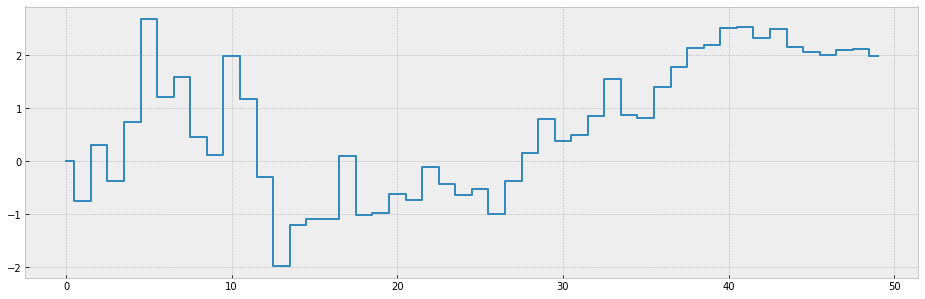

In [14]:
plt.step(x, data, where='mid');   # Los puntos representan el centro del escalón

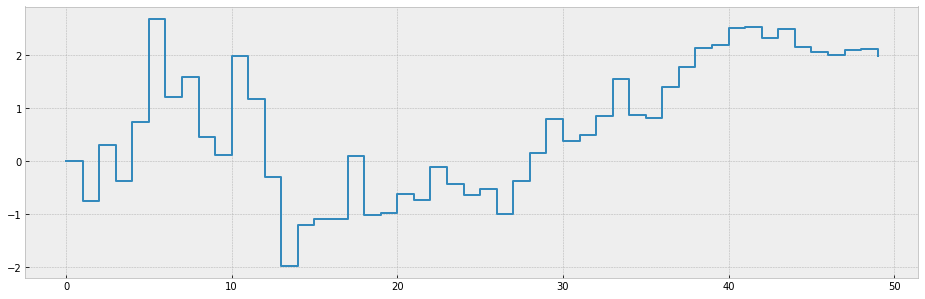

In [15]:
plt.step(x, data, where='post');  # Los puntos representan el borde izquierdo del escalón

### Tallo y Hoja

Esta forma de visualización es adecuada cuando se quiere mostrar el cero, ya que todos los tallos inician en cero. Si se tienen muchos puntos o éstos están muy lejos del cero, este tipo de gráfico resulta poco efectivo.

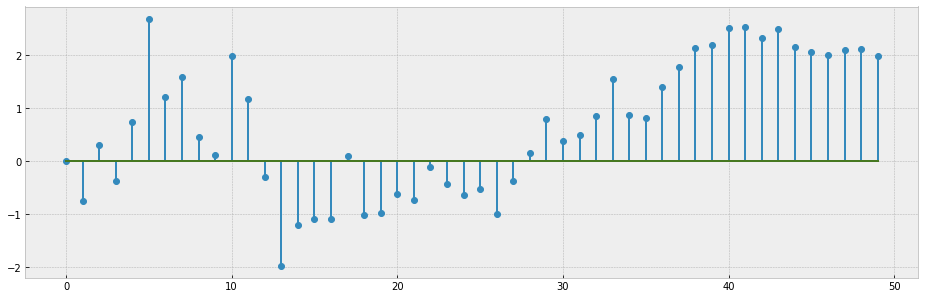

In [13]:
plt.stem(x, data);

### Marcadores Personalizados

El marcador por defecto es el círculo, pero existen múltiples opciones disponibles en el [catálogo oficial de matplotlib](https://matplotlib.org/stable/api/markers_api.html). Estos marcadores pueden usarse en varios gráficos, incluido el `stem` y el `scatter`.

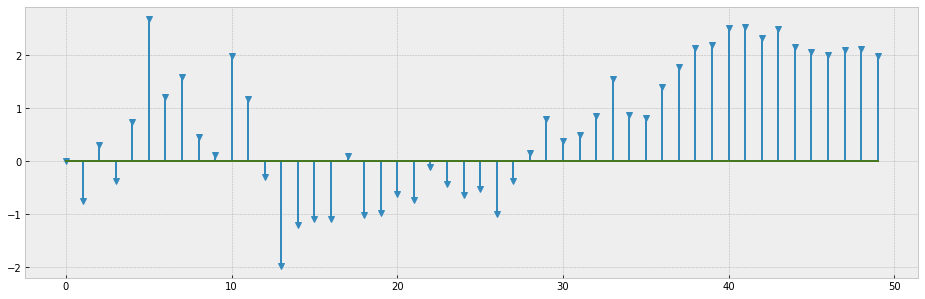

In [10]:
plt.stem(x, data, markerfmt="v");

## Múltiples Gráficos

Si se utilizan varias sentencias de gráficos, el comportamiento por defecto es "superponer" una con otra cambiando el color. Si se desea "finalizar" un gráfico y comenzar uno nuevo, se deberá usar `plt.show`

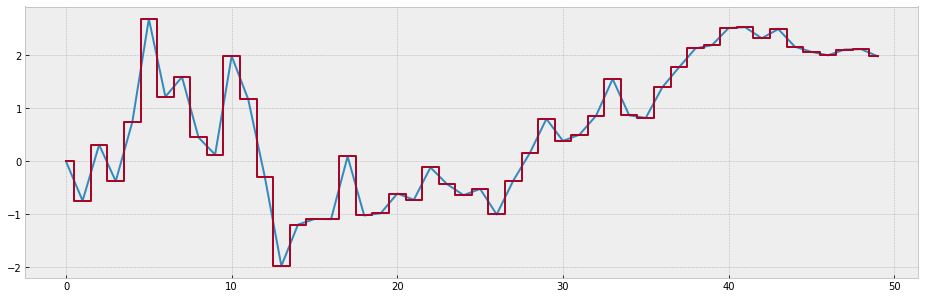

In [16]:
plt.plot(data)
plt.step(x, data, where='mid');

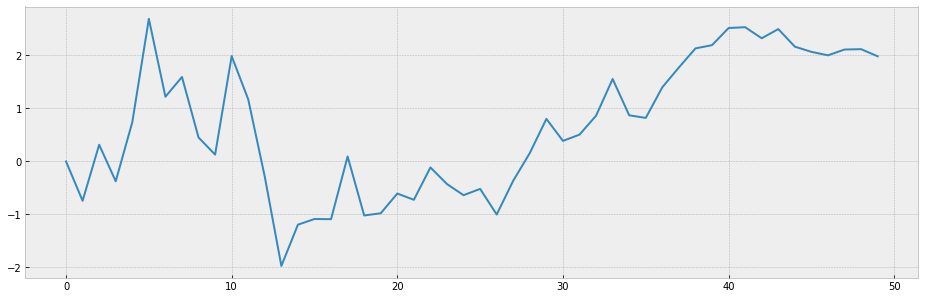

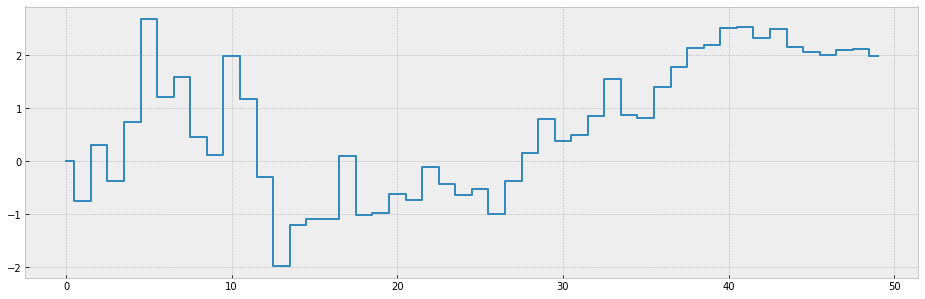

In [17]:
plt.plot(data)
plt.show()

plt.step(x, data, where='mid')
plt.show()

## Líneas auxiliares

Muchas veces resulta útil agregar líneas auxiliares que faciliten la interpretación del gráfico, existen dos maneras, con límites absolutos y con límites procentuales.

Para límites porcentuales
- `axhline`
- `axvline`

Para límites absolutos:
- `hlines`
- `vlines`

### Relativas

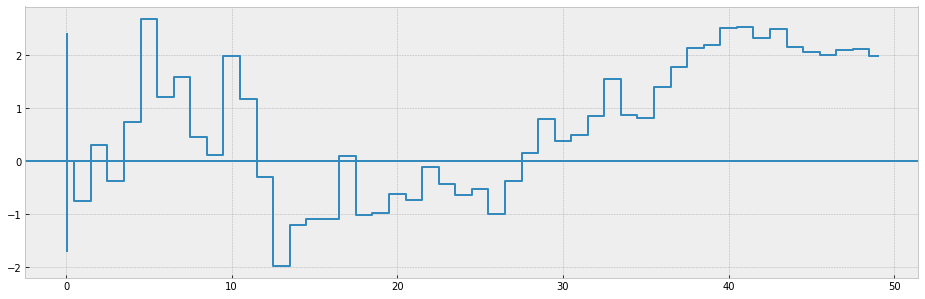

In [20]:
plt.step(x, data, where='mid')

plt.axhline(0)                 # Por defecto, desde el margen izquierdo hasta el margen derecho
plt.axvline(0.03, 0.10, 0.9);  # A la altura de x=0.03, desde el 10% del eje y hasta el 90% del eje y

### Absolutas

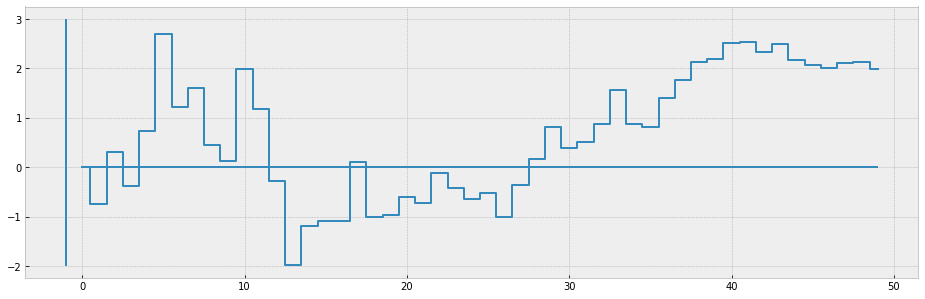

In [22]:
plt.step(x, data, where='mid')

plt.hlines(0, 0, x.max())    # a la altura de y=0, desde x=0 hasta x=x.max() - Los límites son obligatorios
plt.vlines(-1, -2, 3);  # A la altura de x=-1, desde y= -2 hasta y= 3

## Personalización

### Dataset Auxiliar

In [25]:
positive = data >= 0

positive_dataset = data.copy()
positive_dataset[~positive] = 0

negative_dataset = data.copy()
negative_dataset[positive] = 0

array([0.        , 0.        , 0.3144966 , 0.        , 0.73958363,
       2.68926233, 1.22086614, 1.59313546, 0.4516925 , 0.12882788,
       1.98627472, 1.17068502, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.09411335, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.15878582, 0.80258812,
       0.38750622, 0.50552259, 0.86314011, 1.55488762, 0.86991321,
       0.82088187, 1.39912485, 1.77279011, 2.13204046, 2.19297977,
       2.51638711, 2.53182127, 2.32305257, 2.4964901 , 2.16479367,
       2.06671995, 2.00135767, 2.11090883, 2.11749868, 1.98321138])

### Color

Agregar colores resulta fundamental para resaltar aspectos importantes de los gráficos, si bien es posible usar el código hexadecimal para los colores, lo recomendable es usar colores **con nombre** ya que forma parte de un estandar que se extiende a otras plaformas (como diseño web por ejemplo). Las lista oficial de [colores con nombre está en la documentación oficial](https://matplotlib.org/stable/gallery/color/named_colors.html).

Para agregar un color se debe utilizar el parametro `color`.

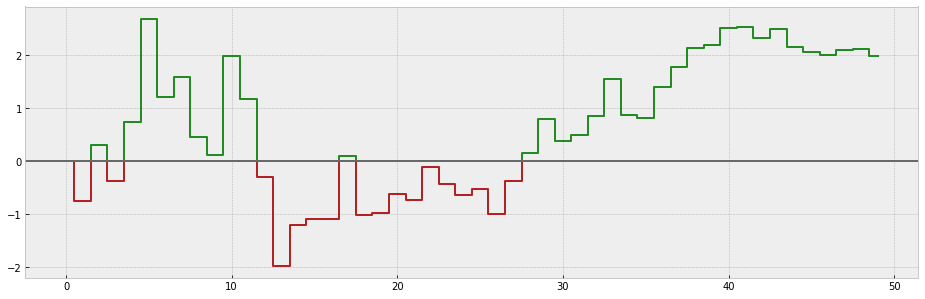

In [26]:
plt.step(x, positive_dataset, where='mid', color="forestgreen")  # Se agrega el parametro color
plt.step(x, negative_dataset, where='mid', color="firebrick")    # Se agrega el parametro color

plt.axhline(0, color="dimgray");                                 # Se agrega el parametro color

### Estilo de Línea

Los estilos de línea son utilizados para distinguir entre diferentes categorias, son especialmente útiles en publicaciones en blanco y negro. La lista completa pueden encontrarse en la [documentación oficial](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)

![Estiles](https://matplotlib.org/stable/_images/sphx_glr_linestyles_001.png)

Para agregar estilos a las líneas se agrega el parámetro `linestyle`, también se puede usar su versión abreviada `ls`

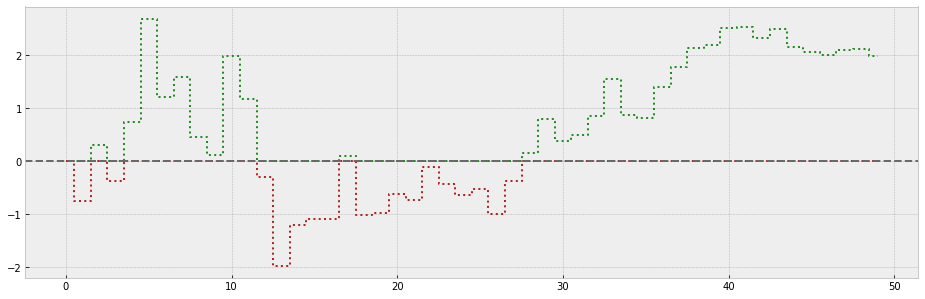

In [17]:
plt.step(x, positive_dataset, where='mid', color="forestgreen", linestyle="dotted")  # Se agrega el parametro linestyle
plt.step(x, negative_dataset, where='mid', color="firebrick", linestyle="dotted")    # Se agrega el parametro linestyle

plt.axhline(0, color="dimgray", linestyle="dashed");                                 # Se agrega el parametro linestyle

### Rellenar Área

Es posible también rellenar el área entre dos curvas con un color sólido, por la naturaleza del gráfico resulta útil sombrear el área entre la curva y el cero. Para rellenar el área entre curvas se usa la función `fill_between`

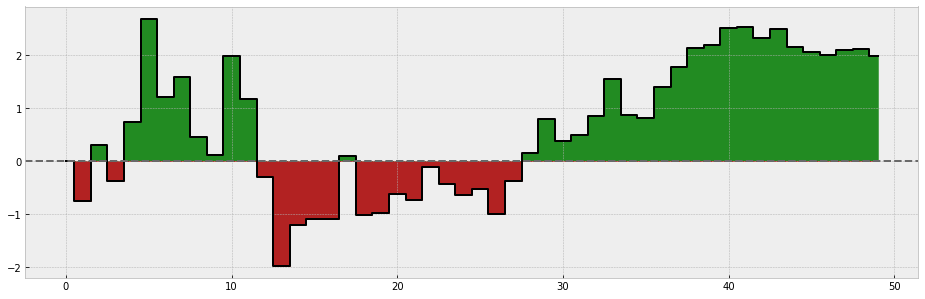

In [18]:
plt.step(x, data, where='mid', color="black")
plt.fill_between(x, positive_dataset, 0, color="forestgreen", step="mid")  # Se agrega la función fill_between
plt.fill_between(x, negative_dataset, 0, color="firebrick", step="mid")    # Se agrega la función fill_between

plt.axhline(0, color="dimgray", linestyle="dashed");

### Transparencia

Normalmente los colores sólidos incorporan demasiado contraste, la forma de remediarlo es incluyendo transparencias, que reducen el impacto visual y también ayudan a visualizar el grid mejor. Para agregar transparencia se usa el parámetro `alpha`

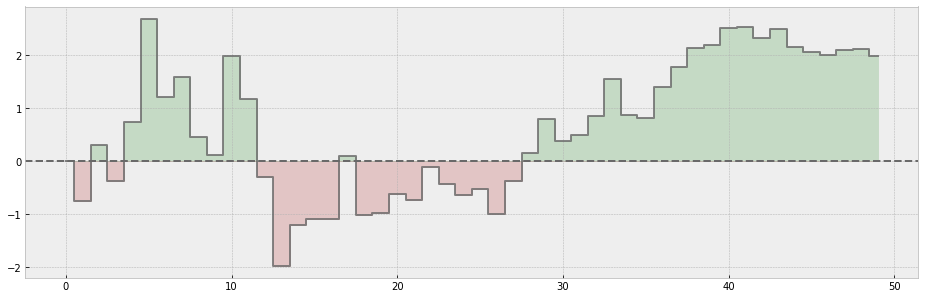

In [19]:
plt.step(x, data, where='mid', color="dimgray", alpha=0.8)                             # Se agrega el parámetro alpha
plt.fill_between(x, positive_dataset, 0, color="forestgreen", step="mid", alpha=0.2)   # Se agrega el parámetro alpha
plt.fill_between(x, negative_dataset, 0, color="firebrick", step="mid", alpha=0.2)     # Se agrega el parámetro alpha

plt.axhline(0, color="dimgray", linestyle="dashed");

### Espesor de la línea

Las líneas por defecto tienen un espesor de `2` pero esto se puede modificar usando `linewidth` o su abreviatura `lw`

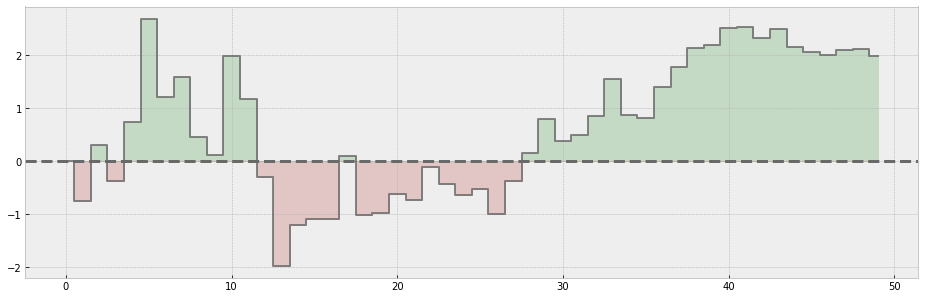

In [20]:
plt.step(x, data, where='mid', color="dimgray", alpha=0.8)

plt.fill_between(x, positive_dataset, 0, color="forestgreen", step="mid", alpha=0.2)
plt.fill_between(x, negative_dataset, 0, color="firebrick", step="mid", alpha=0.2)

plt.axhline(0, color="dimgray", linestyle="dashed", linewidth=3);   # Se agrega el parámetro linewidth

### Ajustar Límites

Los gráficos por defecto tienen un margen al rededor que permite visualizar todo el contenido, no obstante, muchas veces es recomendable ajustar este margen a los valores deseados. Por ejemplo, en este dataset, no tiene sentido contemplar valores negativos en el eje X porque es el tiempo.

Para ajustar los límites tanto en el eje x como en el y se utilizan las funciónes `xlim` y `ylim` respectivamente.

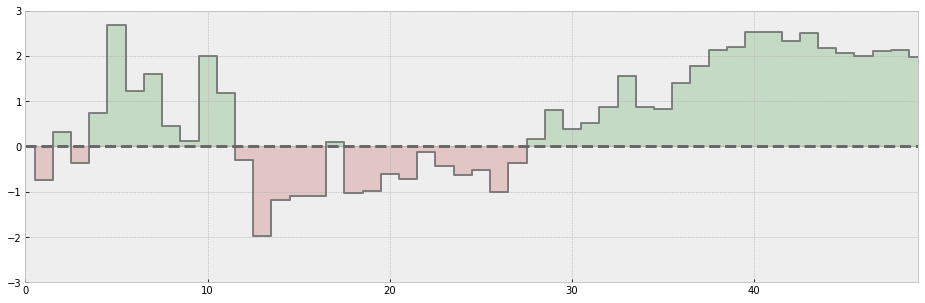

In [21]:
plt.step(x, data, where='mid', color="dimgray", alpha=0.8)

plt.fill_between(x, positive_dataset, 0, color="forestgreen", step="mid", alpha=0.2)
plt.fill_between(x, negative_dataset, 0, color="firebrick", step="mid", alpha=0.2)

plt.axhline(0, color="dimgray", linestyle="dashed", linewidth=3)

plt.xlim(left=0, right=x.max())  # Se agrega la función xlim
plt.ylim(bottom=-3, top=3);      # Se agrega la función ylim

### Ajustar Marcadores

Independientemente de los límites, muchas veces es también requerido cambiar los valores que se muestran en cada eje, en matplotlib estos valores son llamados `ticks` y para cambiarlos uno puede utilizar las funciones `xticks` y `yticks` que cambiarán los valores del eje x e y respectivamente. A estas funciones se les puede pasar cualquier arreglo de valores.

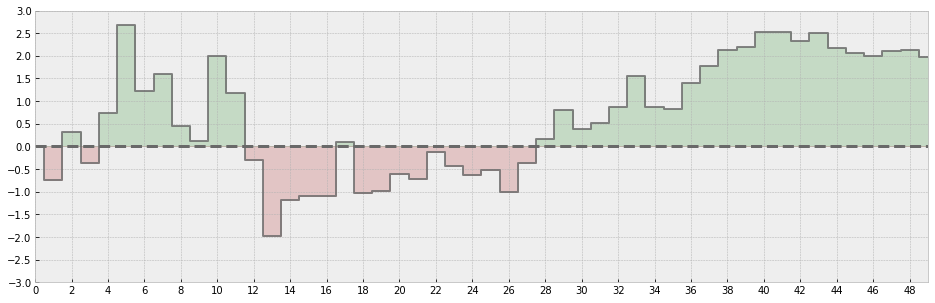

In [27]:
plt.step(x, data, where='mid', color="dimgray", alpha=0.8)

plt.fill_between(x, positive_dataset, 0, color="forestgreen", step="mid", alpha=0.2)
plt.fill_between(x, negative_dataset, 0, color="firebrick", step="mid", alpha=0.2)

plt.axhline(0, color="dimgray", linestyle="dashed", linewidth=3)

plt.xticks(np.arange(0, x.max(), 2))   # Se agrega la función xticks
plt.xlim(left=0, right=x.max())

plt.yticks(np.arange(-3, 3.5, 0.5))    # Se agrega la función yticks
plt.ylim(bottom=-3, top=3);

### Grid

Por defecto el Grid viene deshabilitado, sin embargo, gracias al estilo `bmh` el grid se activa nuevamente por defecto. Para modificar si se muestra o no el grid puede usarse la función `grid` pasando un booleano.

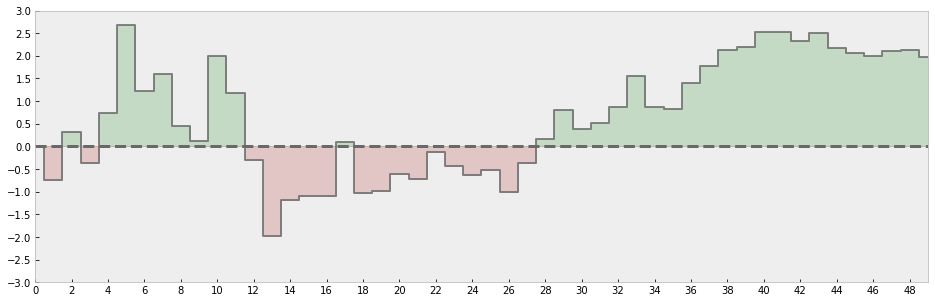

In [23]:
plt.step(x, data, where='mid', color="dimgray", alpha=0.8)

plt.fill_between(x, positive_dataset, 0, color="forestgreen", step="mid", alpha=0.2)
plt.fill_between(x, negative_dataset, 0, color="firebrick", step="mid", alpha=0.2)

plt.axhline(0, color="dimgray", linestyle="dashed", linewidth=3)

plt.xticks(np.arange(0, x.max(), 2))
plt.xlim(left=0, right=x.max())

plt.yticks(np.arange(-3, 3.5, 0.5))
plt.ylim(bottom=-3, top=3)

plt.grid(False);   # Se quita el grid pasando False

### Etiquetas

#### Ejes

Es fundamental que cada eje cuente con un nombre o etiqueta indicando que es lo que representa, estas etiquetas son llamadas `labels` en matplotlib y para agregarlas debe usarle las funciones `xlabel` y `ylabel` respectivamente

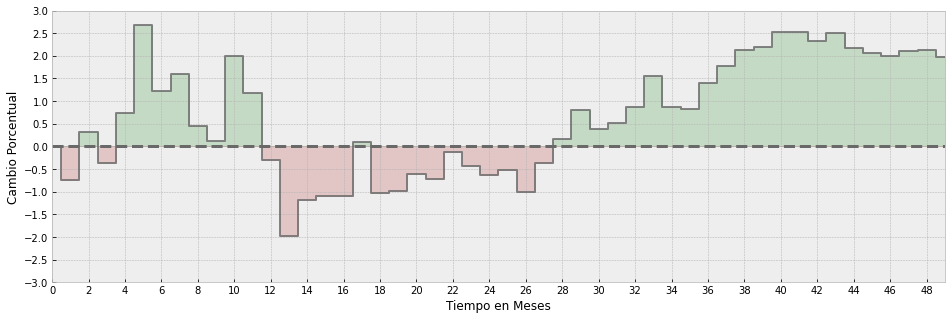

In [24]:
plt.step(x, data, where='mid', color="dimgray", alpha=0.8)

plt.fill_between(x, positive_dataset, 0, color="forestgreen", step="mid", alpha=0.2)
plt.fill_between(x, negative_dataset, 0, color="firebrick", step="mid", alpha=0.2)

plt.axhline(0, color="dimgray", linestyle="dashed", linewidth=3)

plt.xticks(np.arange(0, x.max(), 2))
plt.xlim(left=0, right=x.max())
plt.xlabel("Tiempo en Meses")          # Se agrega la función xlabel

plt.yticks(np.arange(-3, 3.5, 0.5))
plt.ylim(bottom=-3, top=3)
plt.ylabel("Cambio Porcentual");       # Se agrega la función xlabel

#### Título

Todo gráfico debe contar con un gráfico que indique que es lo que se está queriendo comunicar. Para ello conla función `title` se puede agregar el texto deseado como título, también se puede modificar el tamaño con `fontsize`

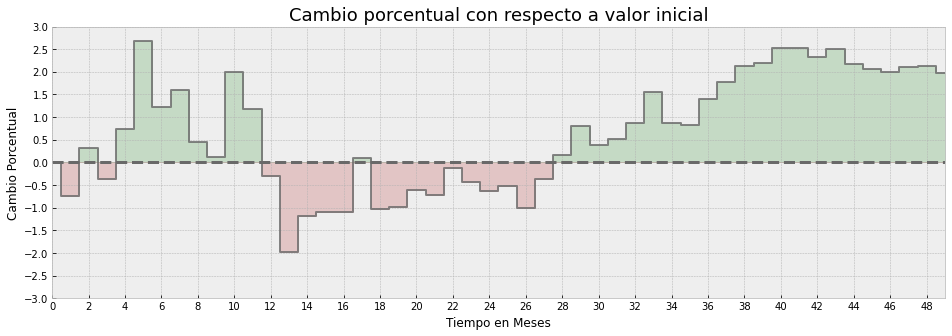

In [25]:
plt.step(x, data, where='mid', color="dimgray", alpha=0.8)

plt.fill_between(x, positive_dataset, 0, color="forestgreen", step="mid", alpha=0.2)
plt.fill_between(x, negative_dataset, 0, color="firebrick", step="mid", alpha=0.2)

plt.axhline(0, color="dimgray", linestyle="dashed", linewidth=3)

plt.xticks(np.arange(0, x.max(), 2))
plt.xlim(left=0, right=x.max())
plt.xlabel("Tiempo en Meses")

plt.yticks(np.arange(-3, 3.5, 0.5))
plt.ylim(bottom=-3, top=3)
plt.ylabel("Cambio Porcentual")

plt.title("Cambio porcentual con respecto a valor inicial", fontsize=18);  # Se agrega la función title

### Leyenda

Una leyenda es un cuadro dentro o fuera del gráfico que muestra las etiquetas que identifican a cada gráfico. Para agregar una etiqueta a un gráfico se debe utilizar el parámetro `label` y para mostrar todas las etiquetas en un cuadro leyenda se debe utilizar la función `legend` al final. También es posible personalizar la posición y la cantidad de columnas con los parámetros `loc` y `ncol` respectivamente

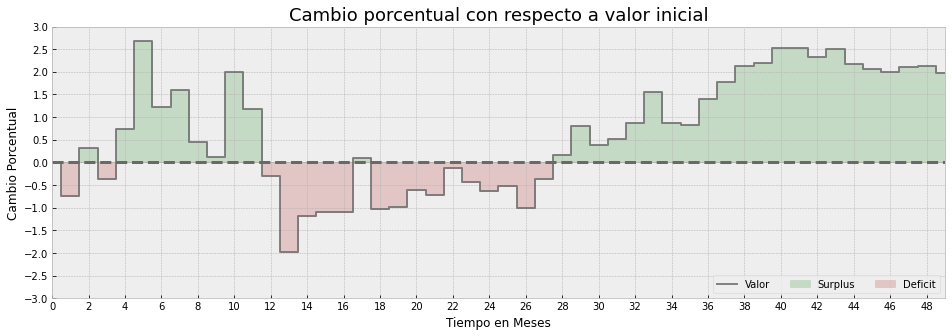

In [26]:
plt.step(x, data, where='mid', color="dimgray", alpha=0.8, label="Valor")                              # Se agrega el parametro label

plt.fill_between(x, positive_dataset, 0, color="forestgreen", step="mid", alpha=0.2, label="Surplus")  # Se agrega el parametro label
plt.fill_between(x, negative_dataset, 0, color="firebrick", step="mid", alpha=0.2, label="Deficit")    # Se agrega el parametro label

plt.axhline(0, color="dimgray", linestyle="dashed", linewidth=3)

plt.xticks(np.arange(0, x.max(), 2))
plt.xlim(left=0, right=x.max())
plt.xlabel("Tiempo en Meses")

plt.yticks(np.arange(-3, 3.5, 0.5))
plt.ylim(bottom=-3, top=3)
plt.ylabel("Cambio Porcentual")

plt.title("Cambio porcentual con respecto a valor inicial", fontsize=18)

plt.legend(loc="lower right", ncol=3);                                                                 # Se agrega la función legend

## Subplots

Los subplots son subgráficos que forman parte de un todo, se disponen normalmente en cuadrícula y pueden tener un número arbitrario de filas y columnas. En este caso se verá un ejemplo básico de dos filas y una columna pero también es posible configurar layouts más complejos, para ver ejemplos, ir a la [galería de subplots de la documentación oficial](https://matplotlib.org/stable/gallery/index.html#subplots-axes-and-figures).

### Dataset Auxiliar

In [28]:
cambio_relativo = np.diff(original_data, prepend=original_data[0])  # Calculo de diferencia relativa con respecto al valor anterior

cambio_relativo /= original_data                                    # Se expresa en ratio con respecto al inicio 
cambio_relativo *= 100                                              # Conversión a porcentaje

positive_relativo = cambio_relativo >= 0

positive_dataset_relativo = cambio_relativo.copy()
positive_dataset_relativo[~positive_relativo] = 0

negative_dataset_relativo = cambio_relativo.copy()
negative_dataset_relativo[positive_relativo] = 0

### Gráfico

La diferencia substancial a la hora de usar subplots es que se deben iniciar los distintos gráficos con el método `subplots`, donde se indica la cantidad de filas (`nrows`), la cantidad de columnas (`ncols`) y el tamaño del gráfico (`figsize`), también se puede explicitar si los subplots tendrán el mismo eje x (`sharex`) o y (`sharey`).

Una nota importante con respecto al `figsize` es que como se aumenta la cantidad de gráficos es recomendable multiplicar el ancho / alto por la cantidad de columnas / filas. Inicialmente se configuró el `figsize` en `(16, 5)`, como se utilizarán dos filas, la altura se multiplicará por dos y quedará `(16, 10)` para que la relación de aspecto sea similar a la original.

Como aclaración, al usar los objetos de subplots, varias funciones cambian de nombre, anteponiéndose el prefijo `set_`, en el código se muestran estos casos. El resto de funciones pueden usarse como si de `plt` se tratase.

Para preparar el gráfico, también es recomendable agregar un título global con `suptitle` y reducir los márgenes y espaciados innecesarios con `tight_layout`, como estos cambios se hacen a nivel global, se deben ejecutar sobre `plt` y no sobre `ax`

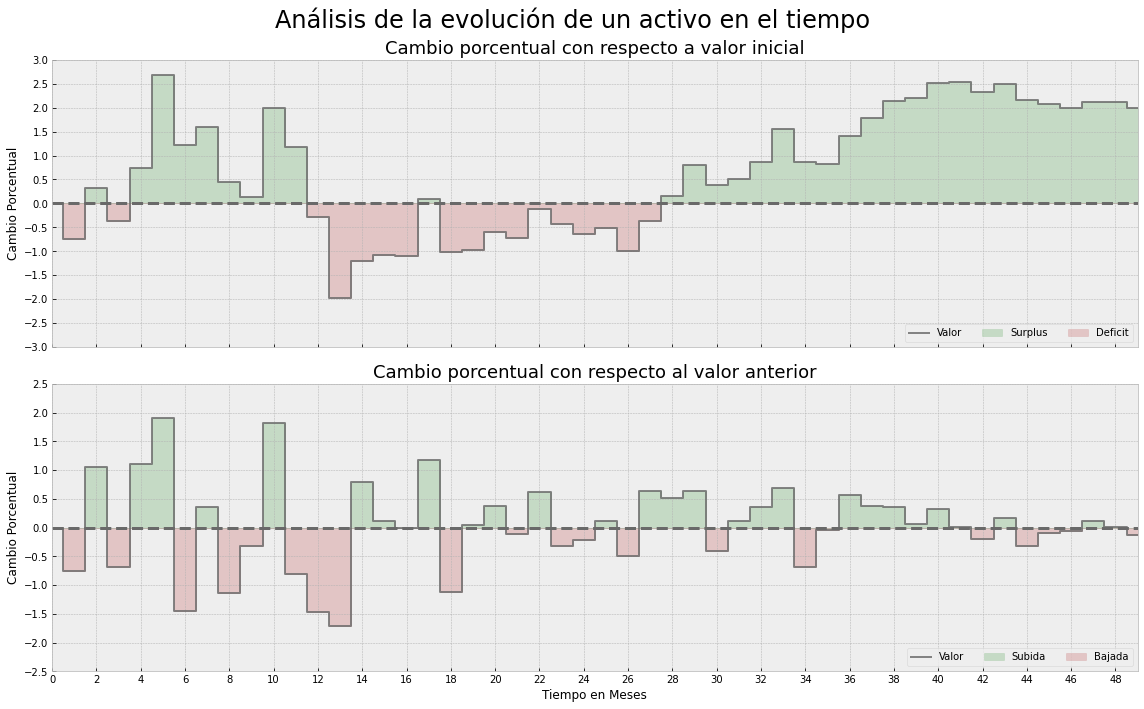

In [28]:
figure, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 10), sharex=True)


# Primer Subplot

ax = axes[0]    # Selecciona el primer subplot, todos los métodos se invocan desde ax en lugar de plt
ax.step(x, data, where='mid', color="dimgray", alpha=0.8, label="Valor")

ax.fill_between(x, positive_dataset, 0, color="forestgreen", step="mid", alpha=0.2, label="Surplus")
ax.fill_between(x, negative_dataset, 0, color="firebrick", step="mid", alpha=0.2, label="Deficit")

ax.axhline(0, color="dimgray", linestyle="dashed", linewidth=3)

ax.set_yticks(np.arange(-3, 3.5, 0.5))                            # Este método ahora empieza con set_
ax.set_ylim(bottom=-3, top=3)                                     # Este método ahora empieza con set_
ax.set_ylabel("Cambio Porcentual")                                # Este método ahora empieza con set_

ax.set_title("Cambio porcentual con respecto a valor inicial", fontsize=18)    # Este método ahora empieza con set_
ax.legend(loc="lower right", ncol=3)


# Segundo Subplot

ax = axes[1]  # Se selecciona el segundo subplot

ax.step(x, cambio_relativo, where="mid", color="dimgray", alpha=0.8, label="Valor")
ax.fill_between(x, positive_dataset_relativo, 0, color="forestgreen", step="mid", alpha=0.2, label="Subida")
ax.fill_between(x, negative_dataset_relativo, 0, color="firebrick", step="mid", alpha=0.2, label="Bajada")

ax.axhline(0, color="dimgray", linestyle="dashed", linewidth=3)

ax.set_xticks(np.arange(0, x.max(), 2))                           # Este método ahora empieza con set_
ax.set_xlim(left=0, right=x.max())                                # Este método ahora empieza con set_
ax.set_xlabel("Tiempo en Meses")                                  # Este método ahora empieza con set_

ax.set_yticks(np.arange(-2.5, 3.0, 0.5))                            # Este método ahora empieza con set_
ax.set_ylim(bottom=-2.5, top=2.5)                                     # Este método ahora empieza con set_
ax.set_ylabel("Cambio Porcentual")                                # Este método ahora empieza con set_

ax.set_title("Cambio porcentual con respecto al valor anterior", fontsize=18)    # Este método ahora empieza con set_
ax.legend(loc="lower right", ncol=3)


# Configuración Global

plt.suptitle("Análisis de la evolución de un activo en el tiempo", fontsize=24)  # Se añade un título global
plt.tight_layout();                                                              # Se ajusta el espaciado

### Diferencia entre subplots y no subplots

En Jupyter uno podría lograr un resultado similar si usara dos gráficos independientes con `plt.show` en el medio. La diferencia entre este enfoque y el enfoque de subplots es que al exportar la imagen, si se usó `plt` sin subplots, se obtendrá una imagen para cada gráfico mientras que al usar subplots se obtiene una única imagen que contiene todos los gráficos

## Agregar detalles

Se agregan detalles como el mínimo y máximo por cada subplot para dejar el gráfico listo.

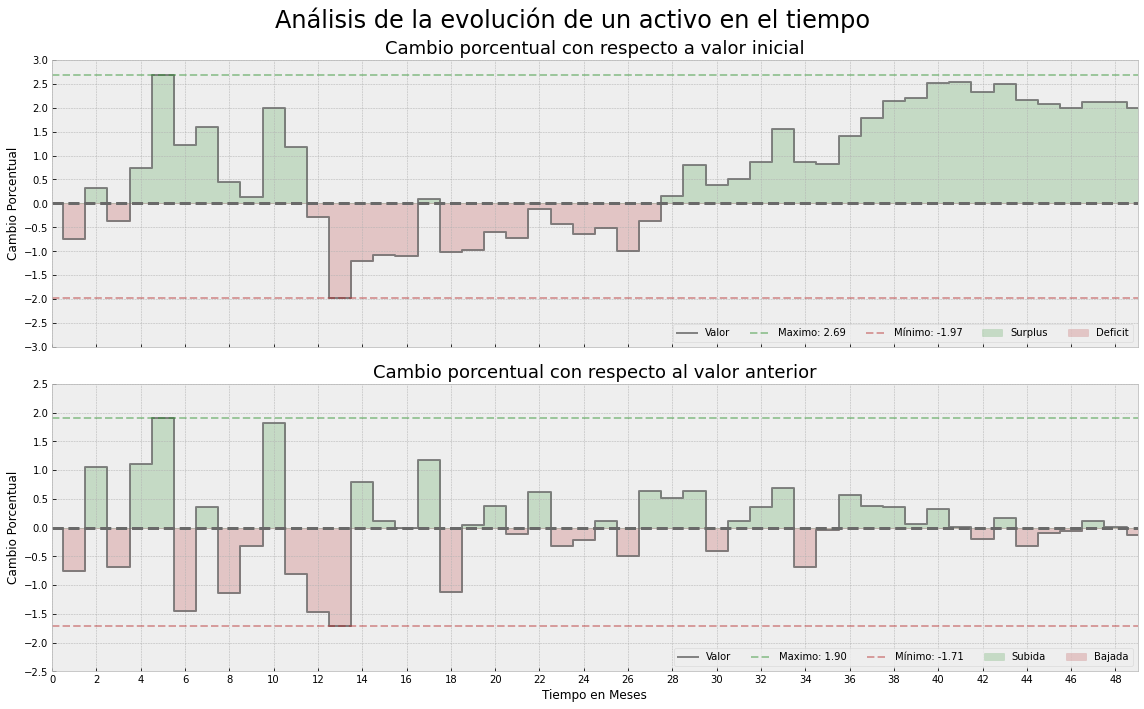

In [29]:
figure, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 10), sharex=True)


# Primer Subplot

ax = axes[0]
ax.step(x, data, where='mid', color="dimgray", alpha=0.8, label="Valor")

ax.fill_between(x, positive_dataset, 0, color="forestgreen", step="mid", alpha=0.2, label="Surplus")
ax.fill_between(x, negative_dataset, 0, color="firebrick", step="mid", alpha=0.2, label="Deficit")

ax.axhline(0, color="dimgray", linestyle="dashed", linewidth=3)
ax.axhline(data.max(), color="forestgreen", linestyle="--", linewidth=2, alpha=0.4, label=f"Maximo: {data.max():.2f}")  # Se Muestra el máximo
ax.axhline(data.min(), color="firebrick", linestyle="--", linewidth=2, alpha=0.4, label=f"Mínimo: {data.min():.2f}")    # Se Muestra el mínimo

ax.set_yticks(np.arange(-3, 3.5, 0.5))
ax.set_ylim(bottom=-3, top=3)
ax.set_ylabel("Cambio Porcentual")

ax.set_title("Cambio porcentual con respecto a valor inicial", fontsize=18)
ax.legend(loc="lower right", ncol=5)


# Segundo Subplot

ax = axes[1]

ax.step(x, cambio_relativo, where="mid", color="dimgray", alpha=0.8, label="Valor")
ax.fill_between(x, positive_dataset_relativo, 0, color="forestgreen", step="mid", alpha=0.2, label="Subida")
ax.fill_between(x, negative_dataset_relativo, 0, color="firebrick", step="mid", alpha=0.2, label="Bajada")

ax.axhline(0, color="dimgray", linestyle="dashed", linewidth=3)
ax.axhline(cambio_relativo.max(), color="forestgreen", linestyle="--", linewidth=2, alpha=0.4, label=f"Maximo: {cambio_relativo.max():.2f}")  # Se Muestra el máximo
ax.axhline(cambio_relativo.min(), color="firebrick", linestyle="--", linewidth=2, alpha=0.4, label=f"Mínimo: {cambio_relativo.min():.2f}")    # Se Muestra el mínimo

ax.set_xticks(np.arange(0, x.max(), 2))
ax.set_xlim(left=0, right=x.max())
ax.set_xlabel("Tiempo en Meses")

ax.set_yticks(np.arange(-2.5, 3, 0.5))
ax.set_ylim(bottom=-2.5, top=2.5)
ax.set_ylabel("Cambio Porcentual")

ax.set_title("Cambio porcentual con respecto al valor anterior", fontsize=18)
ax.legend(loc="lower right", ncol=5)


# Configuración Global

plt.suptitle("Análisis de la evolución de un activo en el tiempo", fontsize=24)
plt.tight_layout()

plt.savefig("images/despues.svg")

## Exportar

Lamentablemente, para exportar un gráfico debe hacerse en la misma celda, pero para evitar copiar y pegar todo el código, se muestran sólamente las líneas necesarias. Estas lineas deberían estar al final de la celda con el gráfico

In [30]:
plt.savefig("evolución_activo.png")  # Usar PNG para distribución masiva, redes sociales, etc.
plt.savefig("evolución_activo.pdf")  # Usar PDF para publicaciones, artículos científicos, etc. 
plt.savefig("evolución_activo.svg")  # Usar SVG para publicación online

plt.savefig("evolución_activo.jpg")  # Usar JPG sólamente si los archivos PNG son demasiado pesados

<Figure size 1152x360 with 0 Axes>

Siempre que sea posible, se debe usar un formato vectorial (`PDF`, `SVG`, `PS`, `EPS`), la ventaja es que estos formatos no pierden calidad al hacer zoom sobre la imagen y suelen ser muy livianos. Cuando este formato no se puede utilizar, por ejemplo, porque el medio de publicación no lo acepta, la siguiente mejor opción son los formatos sin pérdida (`PNG`), y como última alternativa se debe utilizar el formato `JPG`, ya que pierde mucha calidad por su algoritmo de compresión.

Lamentablemente matplotlib no cuenta con soporte para los últimos estándares de imágenes web como `WEBP`, `AVIF`, sin embargo mediante herramientas online uno puede convertir `SVG` a estos formatos.

Esta es una de las principales ventajas de matplotlib contra otras librerías de Data Visualization en Python y es que es de las pocas que permite exportar los gráficos en tantos formatos, especialmente en formatos vectoriales como `PDF` y `SVG`.

## Compatibilidad con Seaborn

Seaborn está construido sobre matplotlib, así que cualquier gráfico puede modificarse utilizando las funciones vistas en este notebook, incluyendo soporte para subplots. A continuación se muestra un ejemplo donde se integran funciones de seaborn y matplotlib.

Usar seaborn facilita de manera significativa la integración con `pandas` y ahorra muchas líneas en cuanto a detalles finos. Sin embargo, siempre que sea necesario, es posible hacer modificaciones posteriores con matplotlib.

In [29]:
import seaborn as sns

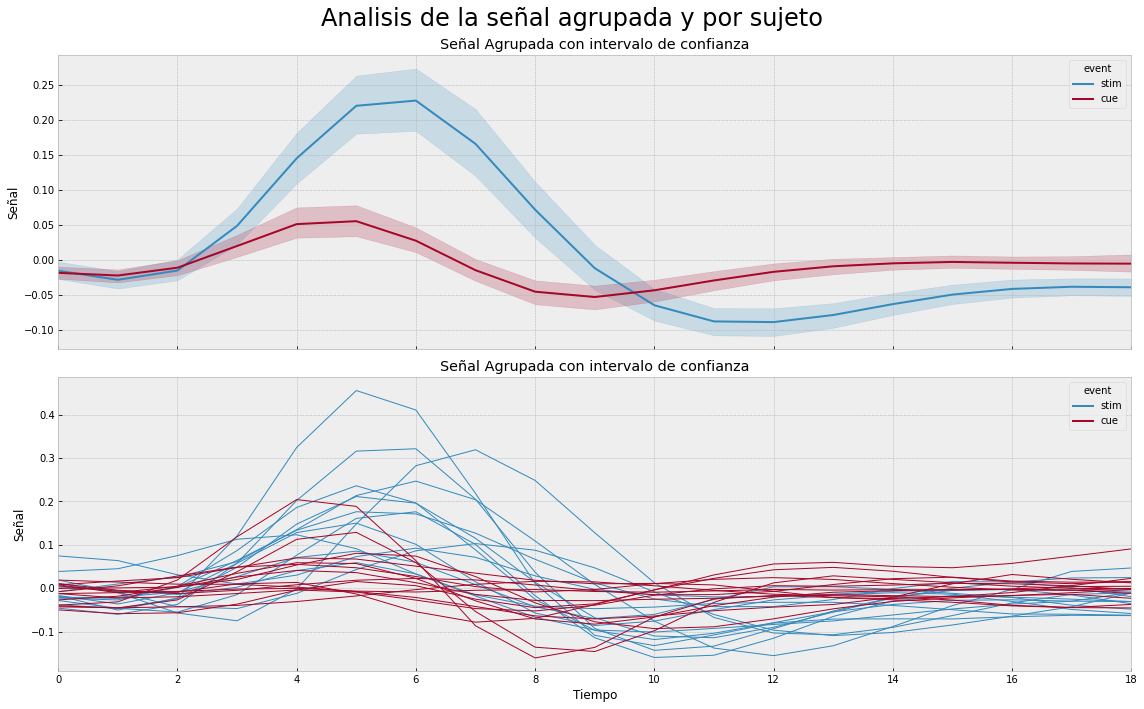

In [30]:
fmri = sns.load_dataset("fmri") # Dataset extraido de la documentación de Line Plot

figure, axes = plt.subplots(nrows=2, figsize=(16, 10), sharex=True)


# Subplot superior

ax = axes[0]
sns.lineplot(x="timepoint", y="signal", hue="event", data=fmri, ax=ax)       # Se agrega el parametro ax
ax.set_ylabel("Señal")
ax.set_title("Señal Agrupada con intervalo de confianza")


# Subplot inferior

ax = axes[1]
frontal_dataset = fmri[fmri["region"] == "frontal"]
sns.lineplot(x="timepoint", y="signal", hue="event", data=frontal_dataset, 
             units="subject", estimator=None, lw=1, ax=ax)                   # Se agrega el parametro ax

ax.set_xlabel("Tiempo")
ax.set_xlim(0, 18)

ax.set_ylabel("Señal")
ax.set_title("Señal Agrupada con intervalo de confianza")


# Configuración Global

plt.suptitle("Analisis de la señal agrupada y por sujeto", fontsize=24)
plt.tight_layout()

## Desventajas de Matplotlib

Matplotlib tiene como principal ventaja que es la herramienta más madura y soportada en el ecosistema de Python, sin embargo hay varios escenarios donde no resulta la mejor alternativa:

- Gráficos interactivos
- Gráficos 3D
- Gráficos Geográficos
- Animaciones

Dependiendo del problema existen diversas librerías que solucionan estos problemas. Las librerías pueden dividirse en 3 categorias, las que dependen de matplotlib (como `Seaborn`), las que dependen de Javascript (como `Plotly` y `Bokeh`) y las que dependen de D3.js (como `Vega` y `Altair`). El siguiente gráfico muestra las alternativas. El autor de la infografía la explica en detalle en su [presentación en la PyCon 2017](https://www.youtube.com/watch?v=FytuB8nFHPQ)

![matplotlib alternatives](https://www.anaconda.com/wp-content/uploads/2019/01/PythonVisLandscape.jpg)

## Recursos Adicionales

### ¿Por qué sólo gráficos de líneas / escalón?

Matplotlib provee funciones para hacer histogramas, gráfico de barras, boxplots, gráficos 3D, mapas de calor y mucho más. Sin embargo, en la mayoría de los casos resulta más sencillo utilizar la versión equivalente de `Seaborn` y sólo usar matplotlib para agregar detalles finales.

Una [galería completa](https://matplotlib.org/stable/gallery/index.html) de ejemplos de lo que es posible con matplotlib se encuentra disponible en la documentación oficial.


### Gráficos Declarativos

Existe una librería nueva en el ecosistema de Python llamada `Altair` que introduce el concepto de Gráficos Declarativos o Álgebra de Gráficos, donde en lugar de decir cómo hacer un gráfico, un explicita qué debe mostrarse. Este enfoque está inspirado en la librería `ggplot2` del lenguaje de programación `R`. Para más información, el desarrollador principal Jake VanderPlas ilustra las ventajas principales de Altair, en sus presentaciones [en la PyCon 2019](https://www.youtube.com/watch?v=vTingdk_pVM) y [en la PyCon 2018](https://www.youtube.com/watch?v=ms29ZPUKxbU) 


### Pie Charts

Los Pie Charts y sus variaciones (Donut chart por ejemplo) **no** son recomendables en **ninguna** situación. Los siguientes recursos ilustran este punto en mayor detalle y su lectura es sumamente **recomendable**.

- [Save the pie for dessert](https://www.perceptualedge.com/articles/visual_business_intelligence/save_the_pies_for_dessert.pdf)
- [An Illustrated Tour of the Pie Chart Study Results](https://eagereyes.org/blog/2016/an-illustrated-tour-of-the-pie-chart-study-results)


### Tutoriales Adicionales

Matplotlib es enseñado todos los años como parte de los tutoriales de la Conferencia de Scipy, las últimas ediciones pueden encontrarse en:

- [PyCon 2020 Tutorial | 1.50 hs | Husni Almoubayyed](https://www.youtube.com/watch?v=cNXioWhEeJc)
- [SciPy  2019 Tutorial | 3.00 hs | Hannah Aizenman, Thomas Caswell](https://www.youtube.com/watch?v=Tr4DYo4v5AY)
- [SciPy  2018 Tutorial | 3.00 hs | Benjamin Root & Hannah Aizenman](https://www.youtube.com/watch?v=6gdNUDs6QPc)
- [SciPy  2017 Tutorial | 3.00 hs | Ben Root](https://www.youtube.com/watch?v=rARMKS8jE9g)
